<a href="https://colab.research.google.com/github/zeineb-ouerghi/DS4SG-Project-/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Exploratory Data Analysis
## Data Overview

In [ ]:
url = 'https://raw.githubusercontent.com/zeineb-ouerghi/DS4SG-Project-/main/Data/Mental-Health-Twitter.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
df.shape

(20000, 11)

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("post_id", axis=1, inplace=True)
df.drop("user_id", axis=1, inplace=True)
percent_null = [(i, df[i].isnull().mean()) for i in df]
percents = pd.DataFrame(percent_null, columns=("Column", "% null values"))
display(percents)

,Column,% null values
0,post_created,0.0
1,post_text,0.0
2,followers,0.0
3,friends,0.0
4,favourites,0.0
5,statuses,0.0
6,retweets,0.0
7,label,0.0


In [ ]:
df.post_created=df.post_created.apply(pd.to_datetime)
#create individual columns for month and year
df["month"]=df.post_created.dt.month
df["year"]=df.post_created.dt.year
df.drop("post_created", axis=1, inplace=True)
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
followers,20000.0,900.48395,1899.913961,0.0,177.0,476.0,1197.0,28614.0
friends,20000.0,782.42875,1834.817945,0.0,211.0,561.0,701.0,28514.0
favourites,20000.0,6398.23555,8393.072914,0.0,243.0,2752.0,8229.0,39008.0
statuses,20000.0,44394.41960,140778.519201,3.0,5129.0,13251.0,52892.0,1063601.0
retweets,20000.0,1437.92730,15119.665118,0.0,0.0,0.0,1.0,839540.0
label,20000.0,0.50000,0.500013,0.0,0.0,0.5,1.0,1.0
month,20000.0,6.71135,4.735351,1.0,1.0,8.0,12.0,12.0
year,20000.0,2015.48595,1.485434,2009.0,2015.0,2016.0,2016.0,2017.0


In [ ]:
df.corr()

,followers,friends,favourites,statuses,retweets,label,month,year
followers,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181,-0.058929,-0.006601
friends,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818,-0.002305,-0.038264
favourites,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289,0.115795,0.240273
statuses,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473,-0.143243,0.213416
retweets,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198,0.012950,0.025722
label,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000,0.038826,-0.680997
month,-0.058929,-0.002305,0.115795,-0.143243,0.012950,0.038826,1.000000,-0.280341
year,-0.006601,-0.038264,0.240273,0.213416,0.025722,-0.680997,-0.280341,1.000000


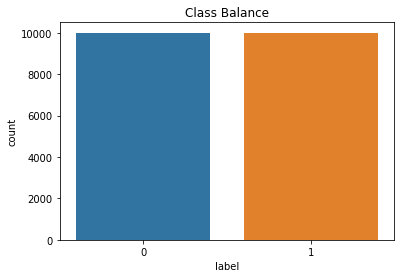

In [ ]:
sns.countplot(data=df,x="label").set(title="Class Balance");

Text(0.5, 1.0, 'Distribution of the Word Count')

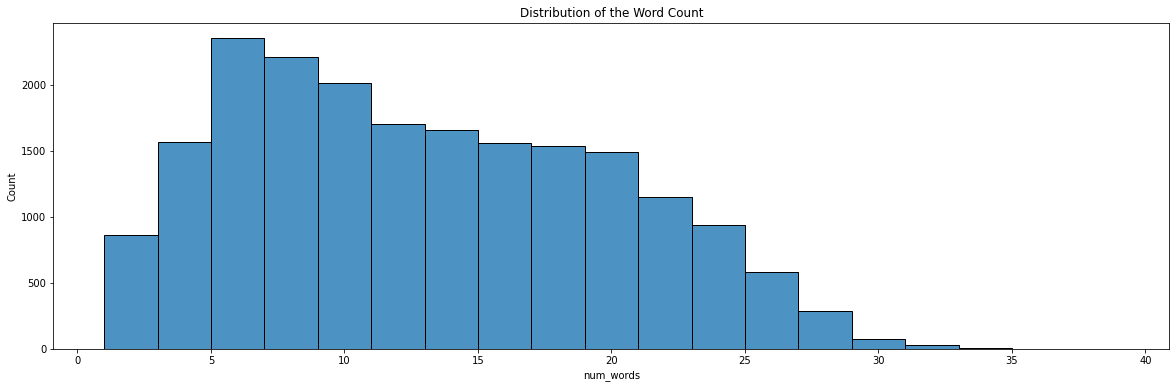

In [ ]:
df['num_words'] = df['post_text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (20,6))
sns.histplot(df['num_words'], bins = range(1, 40, 2), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the Word Count')

## Text Preprocessing

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [ ]:
#convert to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
#remove numerical values
df["post_text"] = df["post_text"].str.replace("\d","")
#remove punctuations
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<ipython-input-12-8d1ccbcdcd51>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("\d","")
<ipython-input-12-8d1ccbcdcd51>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("[^\w\s]","")


In [ ]:
#stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
#keep text that's not stopword
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#lemmatization
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#word tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#frequency (number of words)
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" "))) 

In [ ]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,num_words,tokens,frequency
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,26,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,19,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,13,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,23,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,21,"[hard, say, whether, packing, lists, making, l...",14


## Visualizations
### Word Cloud

In [ ]:
#word cloud
!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


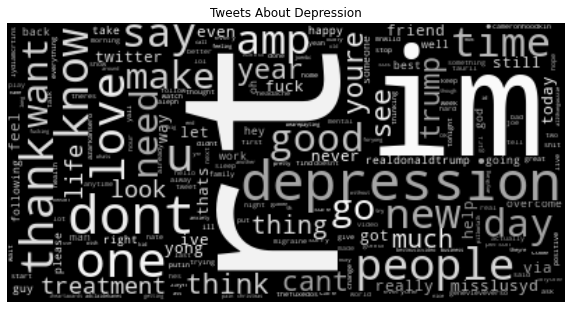

In [ ]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

#convert all posts to a single text
text = " ".join(i for i in df.post_text)

# create wordcloud
wordcloud = WordCloud(collocations=False).generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.title("Tweets About Depression")
plt.show()

In [ ]:
print(text)

years since diagnosed anxiety depression today im taking moment reflect far ive come since sunday need break im planning spend little time possible awake tired need sleep brain ideas rt sewhq retro bears make perfect gifts great beginners get stitching octobers sew sale yay httptco hard say whether packing lists making life easier reinforcing much still needs movinghouse anxiety making packing lists new hobby movinghouse point keeping stuff nostalgic reasons cross line plain old hoarding movinghouse currently findingboxesofrandomshit packing phase think im closet hoarder cant bothered cook take away way lazy rt itventsnews itv releases promo video final series downton abbey httptcomcivezr httptcocfbkrrvjis also much stuff way way much movinghouse never want put one together lotharderthanitlooks httptcoujltcklb moving stuff bloomin knackering theres still loads back house moving stuff peaceful urgh anxiety ffs come breathe much stuff way way much massive purge way hideous traffic must r

### Most Common Words

In [ ]:
from collections import Counter

split_it = text.split()
Counters_found = Counter(split_it)
most_occur = Counters_found.most_common(10)
print(most_occur)

[('rt', 3837), ('im', 1296), ('like', 981), ('depression', 880), ('dont', 841), ('one', 696), ('get', 607), ('love', 598), ('know', 580), ('people', 558)]


In [ ]:
common_words = {'Word': [], 'Count': []}
for word in most_occur:
  common_words['Word'].append(word[0])
  common_words['Count'].append(word[1])
common_df = pd.DataFrame(common_words)
common_df

,Word,Count
0,rt,3837
1,im,1296
2,like,981
3,depression,880
4,dont,841
5,one,696
6,get,607
7,love,598
8,know,580
9,people,558


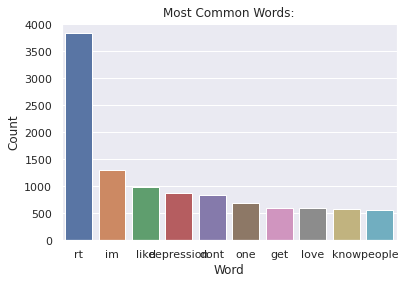

In [ ]:
#bar plot
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=common_df, x="Word", y="Count").set(title="Most Common Words:");

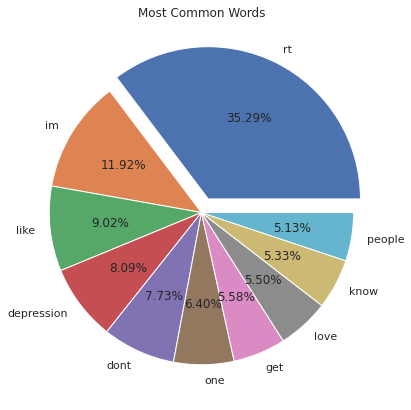

In [ ]:
#pie chart
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(common_df["Count"], labels = common_df["Word"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

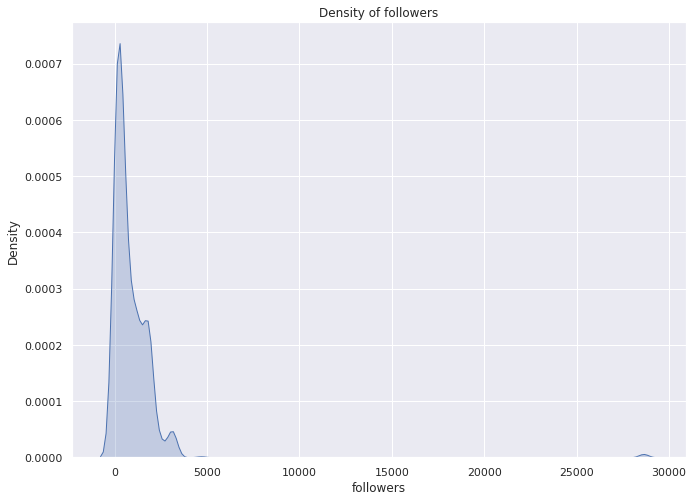

In [ ]:
#density of followers
sns.kdeplot(x=df.followers, shade=True,).set(title="Density of followers");

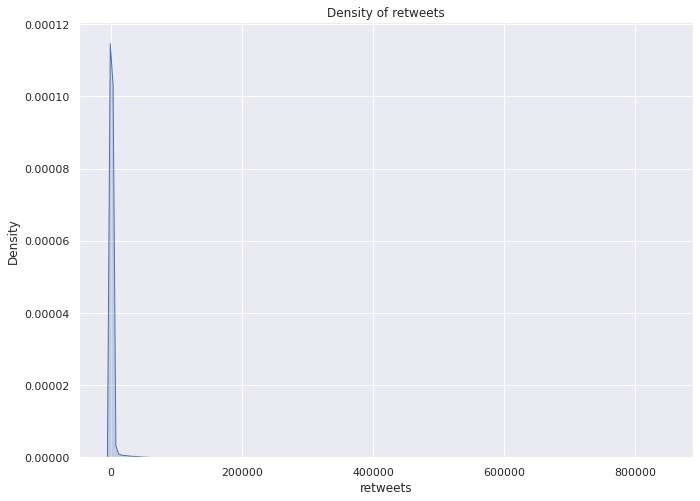

In [ ]:
#density of retweets
sns.kdeplot(x=df.retweets, shade=True,).set(title="Density of retweets");

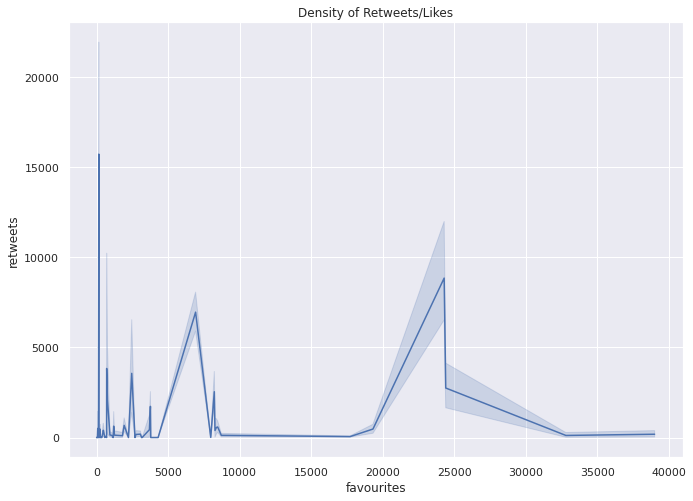

In [ ]:
#retweets/favorites
sns.lineplot(data=df, x="favourites", y="retweets").set(title="Density of Retweets/Likes");

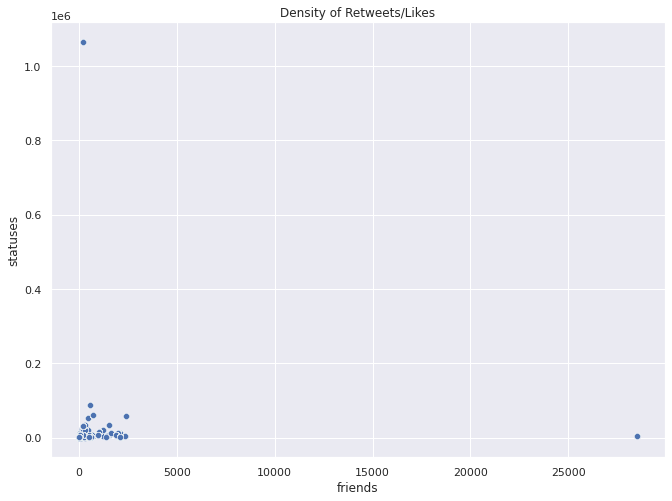

In [ ]:
sns.scatterplot(data=df, x="friends", y="statuses",).set(title="Density of Retweets/Likes");

# Sentiment Analysis

In [ ]:
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
blob_list = []
for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_list.append(blob)

In [ ]:
blob_emptyline2 = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

In [ ]:
df_blob = pd.concat([df.reset_index(drop=True), pd.DataFrame(blob_emptyline2)], axis=1)
df_blob["Sentiment"] =  np.where(df_blob["polarity"] >= 0 , "Positive", "Negative")
df_blob.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,num_words,tokens,frequency,polarity,subjectivity,Sentiment
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,26,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000,Positive
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,19,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000,Negative
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,13,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000,Negative
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,23,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000,Positive
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,21,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833,Negative


# Results

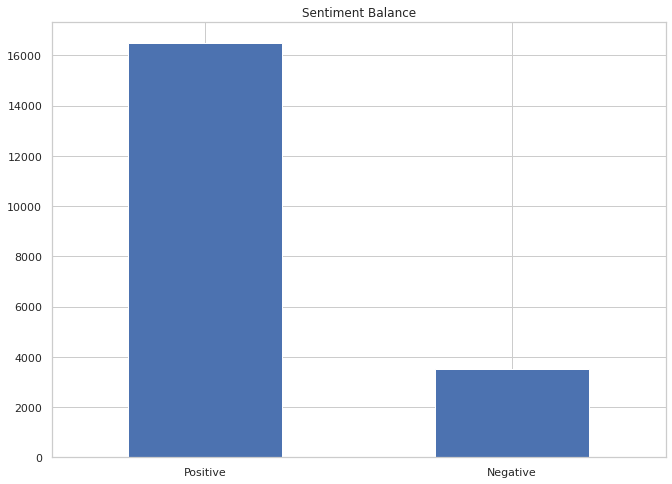

In [ ]:
result = df_blob["Sentiment"].value_counts()
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0).set(title='Sentiment Balance');

In [ ]:
df_blob.groupby("Sentiment").count()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,num_words,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,,,,,
Negative,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517,3517
Positive,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483,16483


In [ ]:
df_blob.groupby("polarity").max()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,num_words,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,,,,,
-1.000000,worst bumbling stumbling statement ive seen in...,3088,2389,24407,1063601,39124,1,12,2017,25,"[worst, bumbling, stumbling, statement, ive, s...",15,1.000000,Negative
-0.900000,sickening httpstcokoohihbrx,677,2057,8375,12913,29,1,12,2017,23,"[sickening, httpstcokoohihbrx]",10,1.000000,Negative
-0.900000,keitholbermann thats one word would go traitor...,126,621,22,2111,2,0,1,2017,12,"[keitholbermann, thats, one, word, would, go, ...",10,1.000000,Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,884,2389,8466,57269,0,0,1,2017,19,"[gop, lawmaker, asks, twitter, vote, whether, ...",13,1.000000,Negative
-0.857143,sick perceived anything everything im told dri...,288,988,280,6694,0,1,12,2015,23,"[sick, perceived, anything, everything, im, to...",8,0.928571,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.850000,woof_all__pets beautiful kitty,3088,2389,32804,86352,20349,1,12,2017,21,"[woof_all__pets, beautiful, kitty]",12,1.000000,Positive
0.866667,saw pitch perfect daughter today loved rebel w...,734,1899,154,5929,0,1,5,2015,18,"[saw, pitch, perfect, daughter, today, loved, ...",10,0.933333,Positive
0.883333,rt phoebejtonkin happy birthday beautiful shel...,235,185,24407,22302,1426,0,1,2017,14,"[rt, phoebejtonkin, happy, birthday, beautiful...",13,0.766667,Positive


# Classification

TfidfVectorizer calculates the term-frequency and inverse document frequency of the sentences and take their dot-product to give a matrix that describes which word has how much significance over the given sentence.

HashingVectorizer-for large data sets it is very low memory scalable. As there in no state during the fit, it can be used in a streaming or parallel pipeline.

In [139]:
data = df['post_text']
data

0        years since diagnosed anxiety depression today...
1        sunday need break im planning spend little tim...
2                       awake tired need sleep brain ideas
3        rt sewhq retro bears make perfect gifts great ...
4        hard say whether packing lists making life eas...
                               ...                        
19995                      day without sunshine like night
19996    borens laws charge ponder trouble delegate dou...
19997    flow chart thoroughly oversold piece program d...
19998                   ships safe harbor never meant stay
19999                        black holes god dividing zero
Name: post_text, Length: 20000, dtype: object

In [140]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

text_vectorizer = make_pipeline(
    HashingVectorizer(n_features=2 ** 20),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=42),
    Normalizer(copy=False),
)

myvect_arr = text_vectorizer.fit_transform(df['post_text'])

In [ ]:
myvect_arr.shape

(20000, 100)

In [ ]:
df.label.unique()

array([1, 0])

In [ ]:
for i in range(myvect_arr.shape[-1]):
    dummy_df = pd.DataFrame(myvect_arr[:,i], columns=[f'textFeature_{i+1}'])
    df = pd.concat([df,dummy_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 112 entries, post_text to textFeature_100
dtypes: float64(100), int64(10), object(2)
memory usage: 17.1+ MB


In [142]:
from sklearn.model_selection import train_test_split
data = df.drop(['post_text', 'label', 'month', 'year', 'tokens'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, df['label'], test_size=0.33, random_state=42)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13400 entries, 7070 to 15795
Columns: 107 entries, followers to textFeature_100
dtypes: float64(100), int64(7)
memory usage: 11.0 MB


In [143]:
X_train.head()

,followers,friends,favourites,statuses,retweets,num_words,frequency,textFeature_1,textFeature_2,textFeature_3,...,textFeature_91,textFeature_92,textFeature_93,textFeature_94,textFeature_95,textFeature_96,textFeature_97,textFeature_98,textFeature_99,textFeature_100
7070,1768,532,3,5720,0,23,11,0.087686,-0.007835,0.000385,...,-0.000979,0.050986,-0.033056,-0.023784,0.023284,-0.003129,0.000093,0.007514,0.069692,-0.014952
13010,126,621,22,2111,0,10,7,0.207212,-0.016114,0.099726,...,-0.056107,0.023417,-0.081674,0.136401,0.088631,0.049194,0.047589,0.221215,-0.130087,0.077665
6688,1768,532,3,5720,0,23,11,0.143631,-0.025429,-0.008545,...,0.047625,-0.080651,0.068124,-0.032692,-0.112861,0.042738,0.022912,-0.054660,0.072111,-0.093555
9976,78,175,664,1148,25,9,8,0.405442,-0.205612,-0.252567,...,0.146573,0.121251,-0.150208,0.085507,0.143583,-0.055384,-0.137559,0.147053,-0.069528,0.133756
5175,914,489,8717,3359,0,11,6,0.192560,0.021077,0.018100,...,-0.170126,-0.109028,-0.078209,0.031707,0.117431,0.136044,0.173828,-0.048973,0.179854,-0.119115


In [ ]:
# define functions we need for cross validation and assessing model accuracy
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score

def metrics(model, X_train, y_train, X_test, y_test):
    """
    Print classification report and confusion matrix for the results of a classification model.
    """
    y_pred = model.predict(X_test)
    print("\nClassification report:\n")
    print(classification_report(y_test, y_pred, target_names=['non-depressed', 'depressed']))
    print("\nCross Validation Score:", cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())
    print("\nConfusion matrix:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print("\nROC Curve:")
    RocCurveDisplay.from_estimator(model, X_test, y_test) 

### Random Forest

Model: Random Forest Classifier:

Classification report:

               precision    recall  f1-score   support

non-depressed       0.90      0.80      0.85      3271
    depressed       0.82      0.91      0.87      3329

     accuracy                           0.86      6600
    macro avg       0.86      0.86      0.86      6600
 weighted avg       0.86      0.86      0.86      6600


Cross Validation Score: 0.859776119402985

Confusion matrix:

ROC Curve:


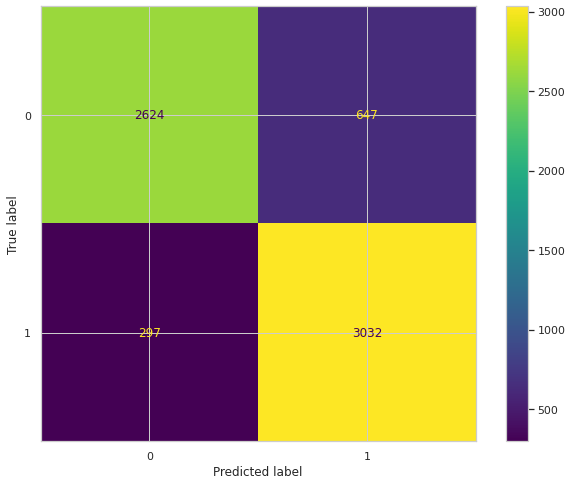

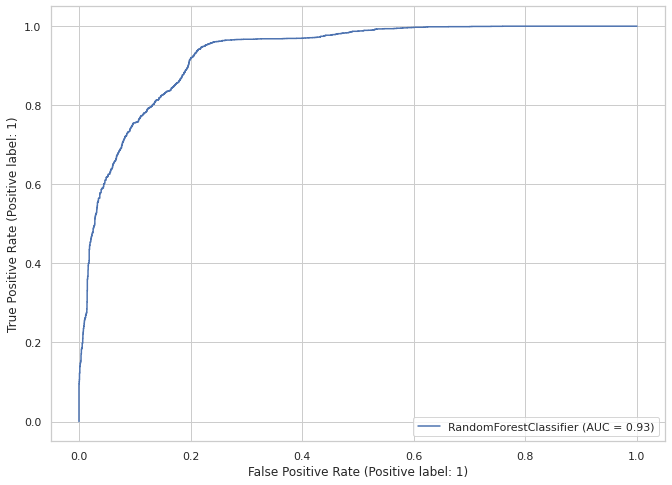

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("Model: Random Forest Classifier:")
clf = RandomForestClassifier(random_state=42, max_depth=2, n_estimators=100)
clf.fit(X_train, y_train)
metrics(clf, X_train, y_train, X_test, y_test)

### Logistic Regression

Model: Logistic Regression

Classification report:

               precision    recall  f1-score   support

non-depressed       0.82      0.74      0.78      3271
    depressed       0.77      0.84      0.80      3329

     accuracy                           0.79      6600
    macro avg       0.79      0.79      0.79      6600
 weighted avg       0.79      0.79      0.79      6600


Cross Validation Score: 0.7877611940298508

Confusion matrix:

ROC Curve:


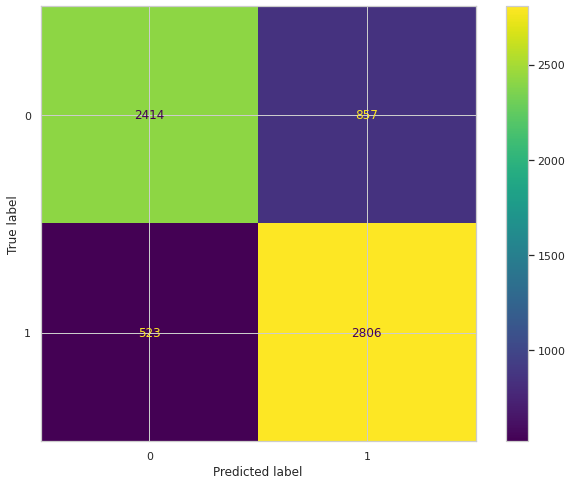

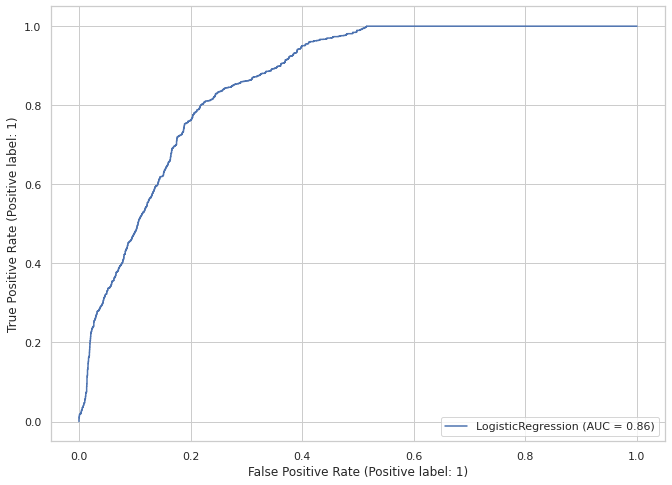

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0, max_iter=3000)
log_classifier.fit(X_train, y_train)

print("Model: Logistic Regression")
metrics(log_classifier, X_train, y_train, X_test, y_test)

### Naive Bayes

Model: Naive Bayes

Classification report:

               precision    recall  f1-score   support

non-depressed       0.90      0.70      0.79      3271
    depressed       0.76      0.93      0.83      3329

     accuracy                           0.81      6600
    macro avg       0.83      0.81      0.81      6600
 weighted avg       0.83      0.81      0.81      6600


Cross Validation Score: 0.8144029850746268

Confusion matrix:

ROC Curve:


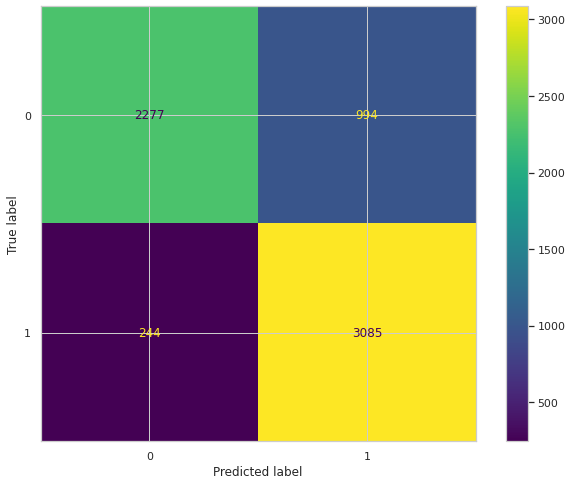

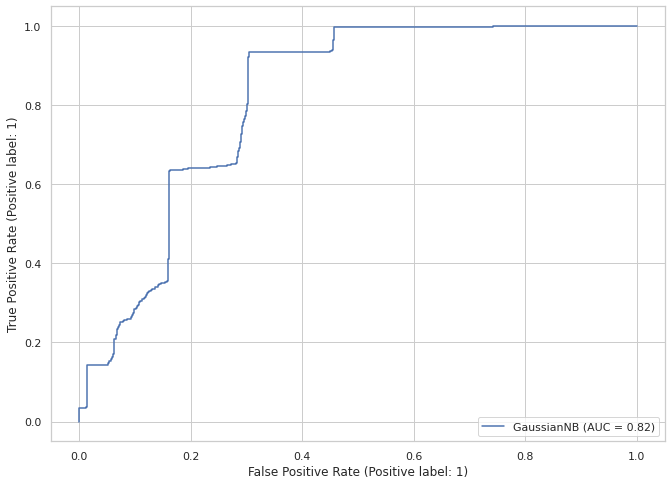

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

print("Model: Naive Bayes")
metrics(nb, X_train, y_train, X_test, y_test)

### XGBoost

Model: XGBoost

Classification report:

               precision    recall  f1-score   support

non-depressed       1.00      1.00      1.00      3271
    depressed       1.00      1.00      1.00      3329

     accuracy                           1.00      6600
    macro avg       1.00      1.00      1.00      6600
 weighted avg       1.00      1.00      1.00      6600


Cross Validation Score: 0.9995522388059701

Confusion matrix:

ROC Curve:


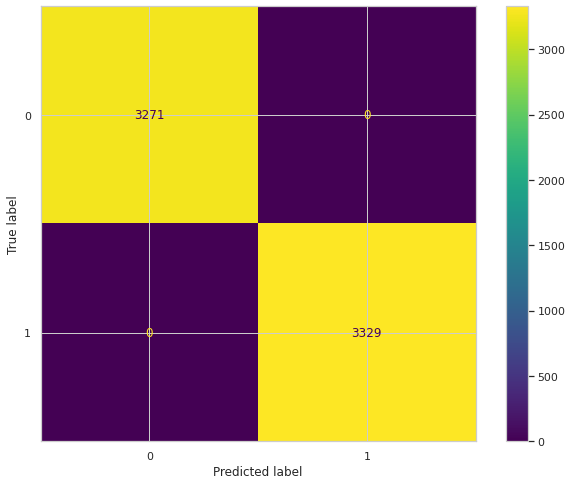

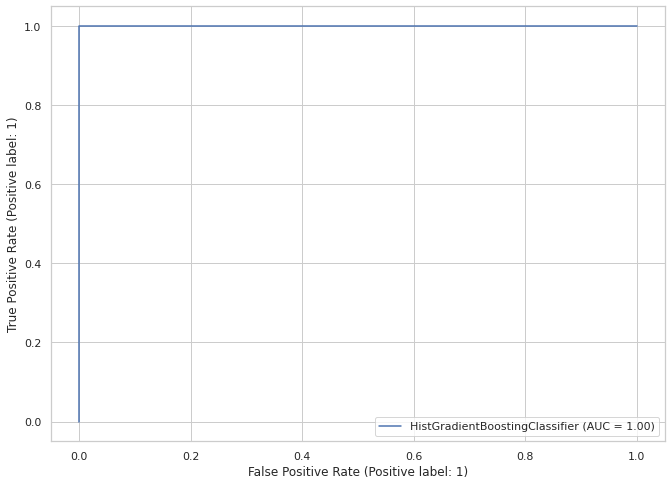

In [148]:
from sklearn.ensemble import HistGradientBoostingClassifier
xgboost = HistGradientBoostingClassifier()
xgboost.fit(X_train, y_train)
print("Model: XGBoost")
metrics(xgboost, X_train, y_train, X_test, y_test)

## Classification using only tweet text

In [146]:
X_train_only_text = X_train.drop(['followers','friends','favourites','statuses','retweets','num_words','frequency'], axis=1)
X_test_only_text = X_test.drop(['followers','friends','favourites','statuses','retweets','num_words','frequency'], axis=1)

In [147]:
X_train_only_text.head()

,textFeature_1,textFeature_2,textFeature_3,textFeature_4,textFeature_5,textFeature_6,textFeature_7,textFeature_8,textFeature_9,textFeature_10,...,textFeature_91,textFeature_92,textFeature_93,textFeature_94,textFeature_95,textFeature_96,textFeature_97,textFeature_98,textFeature_99,textFeature_100
7070,0.087686,-0.007835,0.000385,-0.034056,0.016356,0.037178,0.000968,-0.011884,-0.000777,0.006665,...,-0.000979,0.050986,-0.033056,-0.023784,0.023284,-0.003129,0.000093,0.007514,0.069692,-0.014952
13010,0.207212,-0.016114,0.099726,-0.153874,0.008139,0.014431,-0.035494,-0.025283,-0.009222,0.015583,...,-0.056107,0.023417,-0.081674,0.136401,0.088631,0.049194,0.047589,0.221215,-0.130087,0.077665
6688,0.143631,-0.025429,-0.008545,-0.069648,0.005401,0.059914,-0.068378,-0.053938,0.000485,-0.000684,...,0.047625,-0.080651,0.068124,-0.032692,-0.112861,0.042738,0.022912,-0.054660,0.072111,-0.093555
9976,0.405442,-0.205612,-0.252567,0.242037,-0.077076,-0.025945,0.157519,-0.156769,0.026889,0.038567,...,0.146573,0.121251,-0.150208,0.085507,0.143583,-0.055384,-0.137559,0.147053,-0.069528,0.133756
5175,0.192560,0.021077,0.018100,-0.079922,-0.011167,0.017050,-0.035858,0.017326,-0.002106,-0.111145,...,-0.170126,-0.109028,-0.078209,0.031707,0.117431,0.136044,0.173828,-0.048973,0.179854,-0.119115


Model: XGBoost

Classification report:

               precision    recall  f1-score   support

non-depressed       0.74      0.73      0.74      3271
    depressed       0.74      0.75      0.75      3329

     accuracy                           0.74      6600
    macro avg       0.74      0.74      0.74      6600
 weighted avg       0.74      0.74      0.74      6600


Cross Validation Score: 0.7309701492537313

Confusion matrix:

ROC Curve:


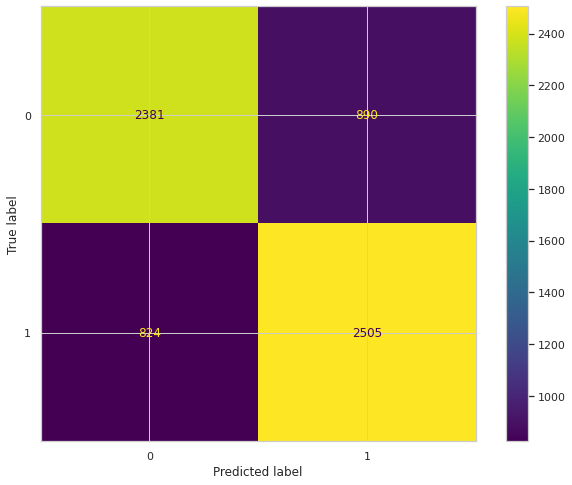

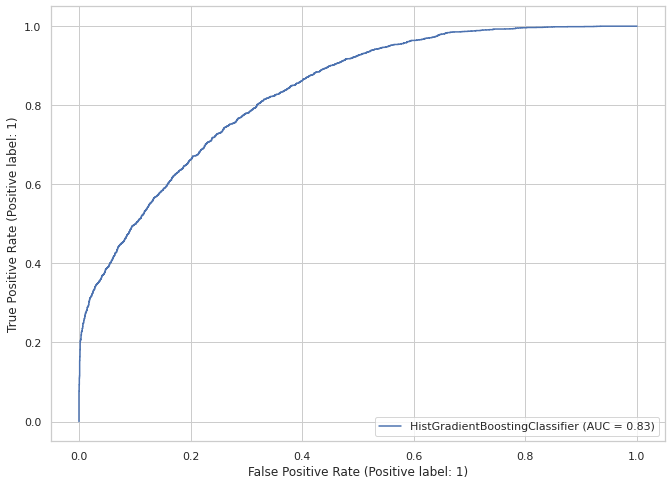

In [150]:
xgboost_only_text = HistGradientBoostingClassifier()
xgboost_only_text.fit(X_train_only_text, y_train)

print("Model: XGBoost")
metrics(xgboost_only_text, X_train_only_text, y_train, X_test_only_text, y_test)

# Experiment using another dataset

In [159]:
d_tweets_path = '/content/clean_d_tweets.csv'
non_d_tweets_path = '/content/clean_non_d_tweets.csv'
d_tweets = pd.read_csv(d_tweets_path)
non_d_tweets = pd.read_csv(non_d_tweets_path)

In [160]:
d_tweets.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1261623711502753792,1261623711502753792,1.589630e+12,2020-05-16 01:45:07,-1000,NaN,the real reason why you be sad you be attach t...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1255537912491343872,1255537912491343872,1.588179e+12,2020-04-29 06:42:19,-1000,NaN,my biggest problem be overthinking everything,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1255524270521761792,1255524270521761792,1.588175e+12,2020-04-29 05:48:07,-1000,NaN,the worst sadness be the sadness you have teac...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1255524059334365186,1255524059334365186,1.588175e+12,2020-04-29 05:47:16,-1000,NaN,i cannot make you understand i cannot make any...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1172463022100512769,1172463022100512769,1.568372e+12,2019-09-13 00:52:22,-1000,NaN,i do not think anyone really understand how ti...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [118]:
# drop null values
d_tweets = d_tweets.dropna(subset=['tweet'])
non_d_tweets = non_d_tweets.dropna(subset=['tweet'])

In [119]:
d_tweets.head()

,tweet,label
0,the real reason why you be sad you be attach t...,1
1,my biggest problem be overthinking everything,1
2,the worst sadness be the sadness you have teac...,1
3,i cannot make you understand i cannot make any...,1
4,i do not think anyone really understand how ti...,1


In [120]:
print(d_tweets['tweet'].isnull().sum(), non_d_tweets['tweet'].isnull().sum())

0 0


In [121]:
d_tweets = d_tweets[['tweet']]
d_tweets['label'] = [1] * len(d_tweets)
non_d_tweets = non_d_tweets[['tweet']]
non_d_tweets['label'] = [0] * len(non_d_tweets)

val_df = pd.concat([d_tweets, non_d_tweets])

In [122]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7745 entries, 0 to 4686
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   7745 non-null   object
 1   label   7745 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 181.5+ KB


In [123]:
#stopwords
val_df['tweet'] = val_df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [124]:
# lemmatization
val_df['tweet'] = val_df['tweet'].apply(lambda x: " ".join([Word(x).lemmatize()]))

In [125]:
# tokenization
val_df["tokens"] = val_df["tweet"].apply(lambda x: TextBlob(x).words)

In [126]:
val_df.head()

,tweet,label,tokens
0,real reason sad attach people distant pay atte...,1,"[real, reason, sad, attach, people, distant, p..."
1,biggest problem overthinking everything,1,"[biggest, problem, overthinking, everything]"
2,worst sadness sadness teach hide,1,"[worst, sadness, sadness, teach, hide]"
3,cannot make understand cannot make anyone unde...,1,"[can, not, make, understand, can, not, make, a..."
4,think anyone really understand tire act okay a...,1,"[think, anyone, really, understand, tire, act,..."


### Word cloud to see frequent words

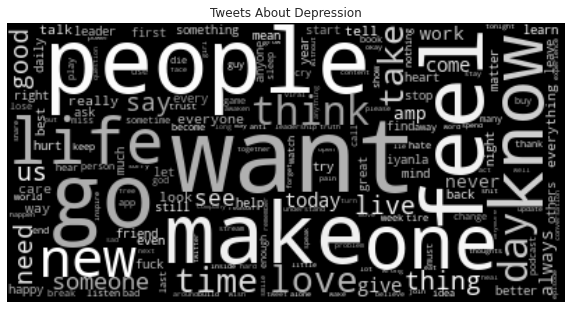

In [127]:
# word cloud
val_text = " ".join(i for i in val_df.tweet)

# create wordcloud
wordcloud = WordCloud(collocations=False).generate(val_text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.title("Tweets About Depression")
plt.show()

## Random Forest

Model: Random Forest Classifier:

Classification report:

               precision    recall  f1-score   support

non-depressed       0.62      0.99      0.76       909
    depressed       0.87      0.14      0.24       640

     accuracy                           0.64      1549
    macro avg       0.75      0.56      0.50      1549
 weighted avg       0.72      0.64      0.55      1549


Cross Validation Score: 0.6502569710224166

Confusion matrix:

ROC Curve:


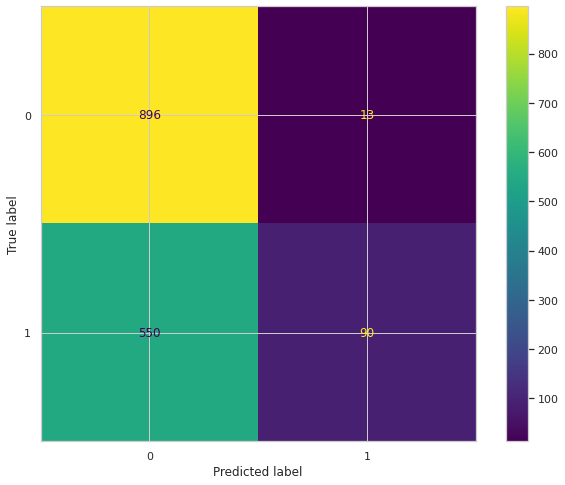

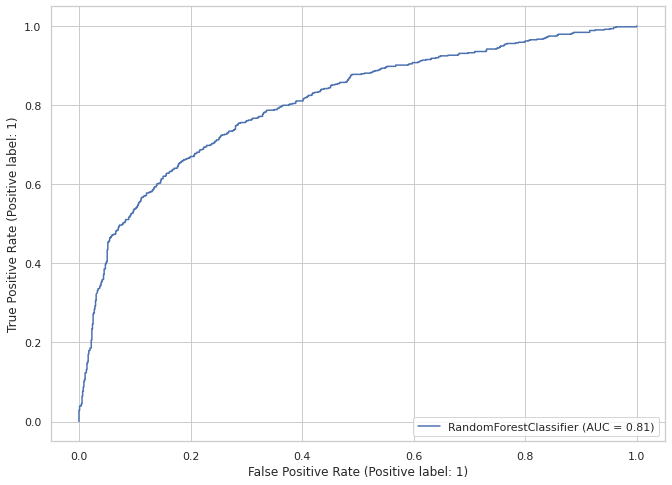

In [195]:
print("Model: Random Forest Classifier:")
clf2 = RandomForestClassifier(random_state=42, max_depth=2, n_estimators=100)
clf2.fit(X_train_2, y_train_2)
metrics(clf2, X_train_2, y_train_2, X_test_2, y_test_2)

Model: XGBoost

Classification report:

               precision    recall  f1-score   support

non-depressed       0.81      0.86      0.84       909
    depressed       0.79      0.71      0.75       640

     accuracy                           0.80      1549
    macro avg       0.80      0.79      0.79      1549
 weighted avg       0.80      0.80      0.80      1549


Cross Validation Score: 0.7934144341170037

Confusion matrix:

ROC Curve:


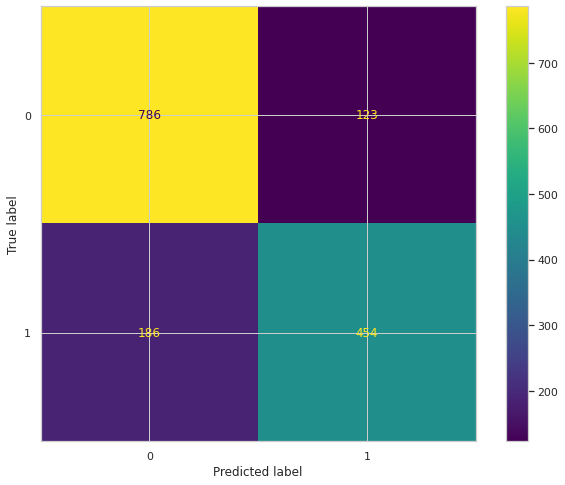

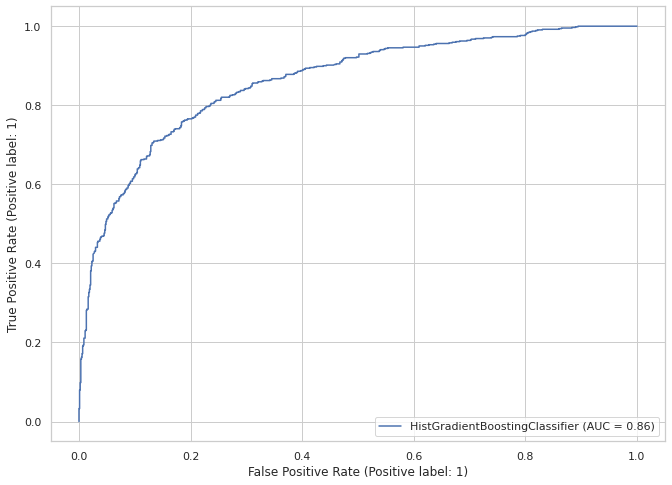

In [178]:
xgboost2 = HistGradientBoostingClassifier()
xgboost2.fit(X_train_2, y_train_2)
print("Model: XGBoost")
metrics(xgboost2, X_train_2, y_train_2, X_test_2, y_test_2)

## Logistic Regression

Model: Logistic Regression

Classification report:

               precision    recall  f1-score   support

non-depressed       0.80      0.86      0.83       909
    depressed       0.78      0.69      0.73       640

     accuracy                           0.79      1549
    macro avg       0.79      0.78      0.78      1549
 weighted avg       0.79      0.79      0.79      1549


Cross Validation Score: 0.7892175011065115

Confusion matrix:

ROC Curve:


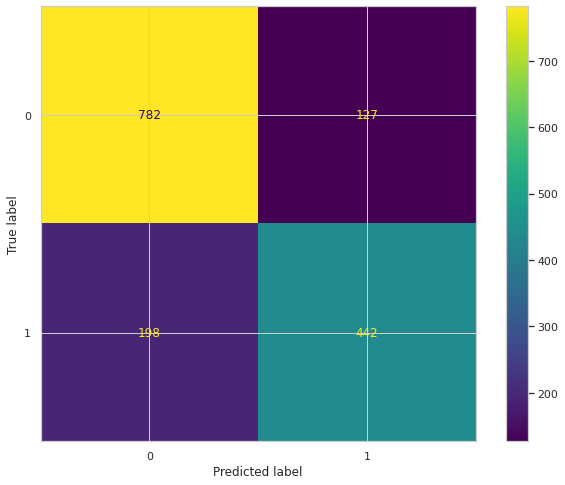

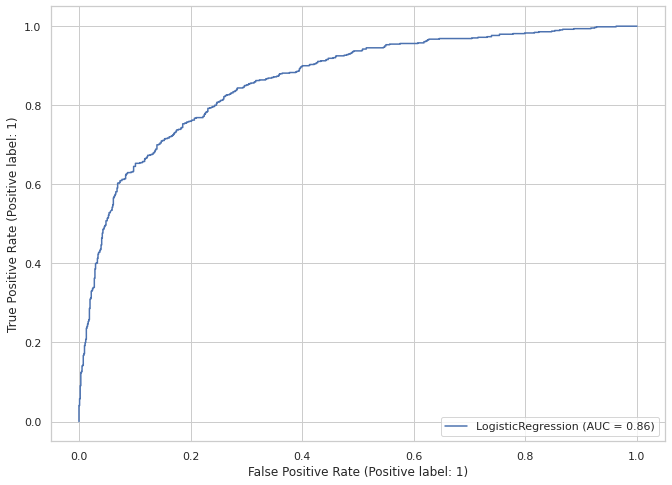

In [196]:
log_classifier2 = LogisticRegression(random_state = 0, max_iter=3000)
log_classifier2.fit(X_train_2, y_train_2)

print("Model: Logistic Regression")
metrics(log_classifier2, X_train_2, y_train_2, X_test_2, y_test_2)

## Naive Bayes

Model: Naive Bayes

Classification report:

               precision    recall  f1-score   support

non-depressed       0.77      0.73      0.75       909
    depressed       0.64      0.69      0.67       640

     accuracy                           0.71      1549
    macro avg       0.71      0.71      0.71      1549
 weighted avg       0.72      0.71      0.71      1549


Cross Validation Score: 0.70642492644953

Confusion matrix:

ROC Curve:


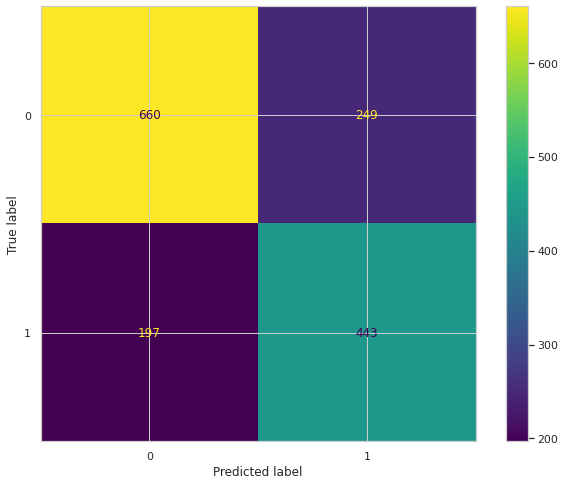

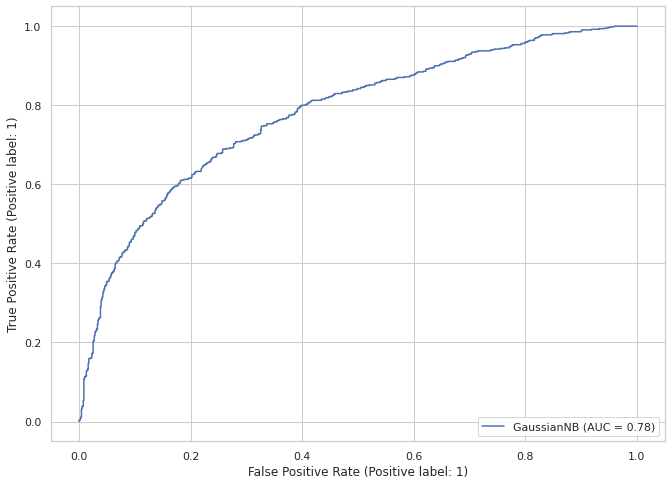

In [197]:
nb2 = GaussianNB()
nb2.fit(X_train_2, y_train_2)

print("Model: Naive Bayes")
metrics(nb2, X_train_2, y_train_2, X_test_2, y_test_2)

## XGBoost

In [ ]:
val_vectr_arr = text_vectorizer.fit_transform(val_df['tweet'])

In [ ]:
val_vectr_arr.shape

(7745, 100)

In [132]:
val_df = val_df.reset_index(drop=True)
for i in range(100):
    dummy_df = pd.DataFrame(val_vectr_arr[:,i], columns=[f'textFeature_{i+1}'])
    val_df = pd.concat([val_df,dummy_df], axis=1)
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7745 entries, 0 to 7744
Columns: 103 entries, tweet to textFeature_100
dtypes: float64(100), int64(1), object(2)
memory usage: 6.1+ MB


In [175]:
X = val_df.drop(['tweet', 'label', 'tokens'], axis=1)
y = val_df['label']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
X_train_2.head()

,textFeature_1,textFeature_2,textFeature_3,textFeature_4,textFeature_5,textFeature_6,textFeature_7,textFeature_8,textFeature_9,textFeature_10,...,textFeature_91,textFeature_92,textFeature_93,textFeature_94,textFeature_95,textFeature_96,textFeature_97,textFeature_98,textFeature_99,textFeature_100
6456,0.282630,-0.082854,-0.200118,0.314297,0.118568,0.021367,0.122791,-0.267363,-0.361126,-0.347090,...,0.106586,-0.030041,0.024054,0.085829,-0.050879,-0.073648,-0.000592,0.016106,0.022366,0.063142
254,0.226476,-0.058629,-0.050411,-0.080672,-0.020682,0.132696,-0.089188,-0.135379,-0.103781,-0.004642,...,0.042167,-0.103288,0.008551,0.041603,-0.074997,0.075805,-0.049079,-0.062813,0.020221,0.031567
6113,0.202668,0.042851,-0.085892,-0.057419,-0.037263,0.005673,0.008649,0.024239,0.197014,0.116177,...,0.022889,-0.050074,0.158724,0.066999,-0.099931,-0.099821,0.021902,-0.017484,-0.008411,0.101466
5804,0.184757,0.059248,-0.039667,-0.173543,0.105154,-0.152561,-0.020116,0.010581,-0.120634,0.095349,...,-0.088510,0.202597,-0.179925,-0.021574,-0.068121,0.168232,0.104602,0.173231,-0.011922,0.147252
221,0.165083,0.159122,-0.024249,-0.085378,0.405499,0.012441,-0.012814,0.035254,0.088976,-0.277918,...,-0.053438,0.009408,-0.016685,0.028433,0.034892,-0.007622,-0.028560,0.025798,0.017735,-0.020566
